### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

### Import the Dataset

In [2]:
gold_df = pd.read_csv('./financial_regression.csv')

### Print First 5 Rows

In [3]:
gold_df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


### Mathematical Operations

In [4]:
gold_df.describe()

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
count,3719.000000,3719.000000,3719.000000,3719.000000,3.719000e+03,3719.000000,3719.000000,3719.000000,3719.00000,3719.000000,...,3719.000000,3719.000000,3719.000000,3.719000e+03,3719.000000,3719.000000,3719.000000,3719.000000,3719.000000,3.719000e+03
mean,268.732724,270.179765,267.157446,268.779352,1.124206e+08,3.022320,181.394495,182.689784,179.98249,181.431795,...,110.184473,107.931862,109.067990,7.169556e+04,2.252611,145.454975,146.101477,144.761329,145.453861,9.658138e+06
std,121.374890,122.024860,120.663204,121.393684,6.902901e+07,2.656917,122.468973,123.393400,121.43517,122.473492,...,58.454170,56.877967,57.688191,9.790703e+04,2.543622,29.604259,29.754711,29.422517,29.611348,6.182342e+06
min,103.110000,103.420000,101.130000,102.200000,1.708170e+05,0.300000,42.670000,42.821500,41.55000,42.470000,...,40.550000,38.490000,40.090000,3.157000e+03,0.230000,100.920000,100.990000,100.232600,100.500000,1.436508e+06
25%,169.715000,170.175000,169.030000,169.650000,6.699112e+07,1.280000,78.700000,79.150000,78.31500,78.730000,...,69.400000,68.270000,68.820000,2.085900e+04,0.870000,120.555000,121.030000,120.170000,120.590000,5.795310e+06
50%,241.180000,242.080000,239.450000,240.610000,9.239907e+07,2.090000,138.720000,139.420000,138.02000,139.050000,...,83.900000,82.650000,83.210000,3.829500e+04,1.414000,137.620000,138.140000,136.990000,137.710000,8.087993e+06
75%,374.455000,377.800000,371.045000,374.255000,1.367146e+08,3.815000,284.165000,287.590000,281.23000,284.835000,...,143.785000,140.480000,142.040000,8.420700e+04,2.680000,167.770000,168.412500,167.055000,167.835000,1.156729e+07
max,585.910000,586.120000,582.580000,584.590000,7.095045e+08,22.960000,503.070000,503.520000,498.39000,502.960000,...,298.210000,277.000100,295.000000,1.199042e+06,45.392300,253.080000,253.940000,252.520000,253.930000,9.369811e+07


### Basic Information About the DataSet

In [5]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3904 non-null   object 
 1   sp500 open          3719 non-null   float64
 2   sp500 high          3719 non-null   float64
 3   sp500 low           3719 non-null   float64
 4   sp500 close         3719 non-null   float64
 5   sp500 volume        3719 non-null   float64
 6   sp500 high-low      3719 non-null   float64
 7   nasdaq open         3719 non-null   float64
 8   nasdaq high         3719 non-null   float64
 9   nasdaq low          3719 non-null   float64
 10  nasdaq close        3719 non-null   float64
 11  nasdaq volume       3719 non-null   float64
 12  nasdaq high-low     3719 non-null   float64
 13  us_rates_%          176 non-null    float64
 14  CPI                 176 non-null    float64
 15  usd_chf             3694 non-null   float64
 16  eur_us

### Print Null Values

In [6]:
null_values = gold_df.isnull().sum()
null_values

date                     0
sp500 open             185
sp500 high             185
sp500 low              185
sp500 close            185
sp500 volume           185
sp500 high-low         185
nasdaq open            185
nasdaq high            185
nasdaq low             185
nasdaq close           185
nasdaq volume          185
nasdaq high-low        185
us_rates_%            3728
CPI                   3728
usd_chf                210
eur_usd                210
GDP                   3847
silver open            185
silver high            185
silver low             185
silver close           185
silver volume          185
silver high-low        185
oil open               185
oil high               185
oil low                185
oil close              185
oil volume             185
oil high-low           185
platinum open          185
platinum high          185
platinum low           185
platinum close         185
platinum volume        185
platinum high-low      185
palladium open         185
p

### Visualize Null Values

<Axes: >

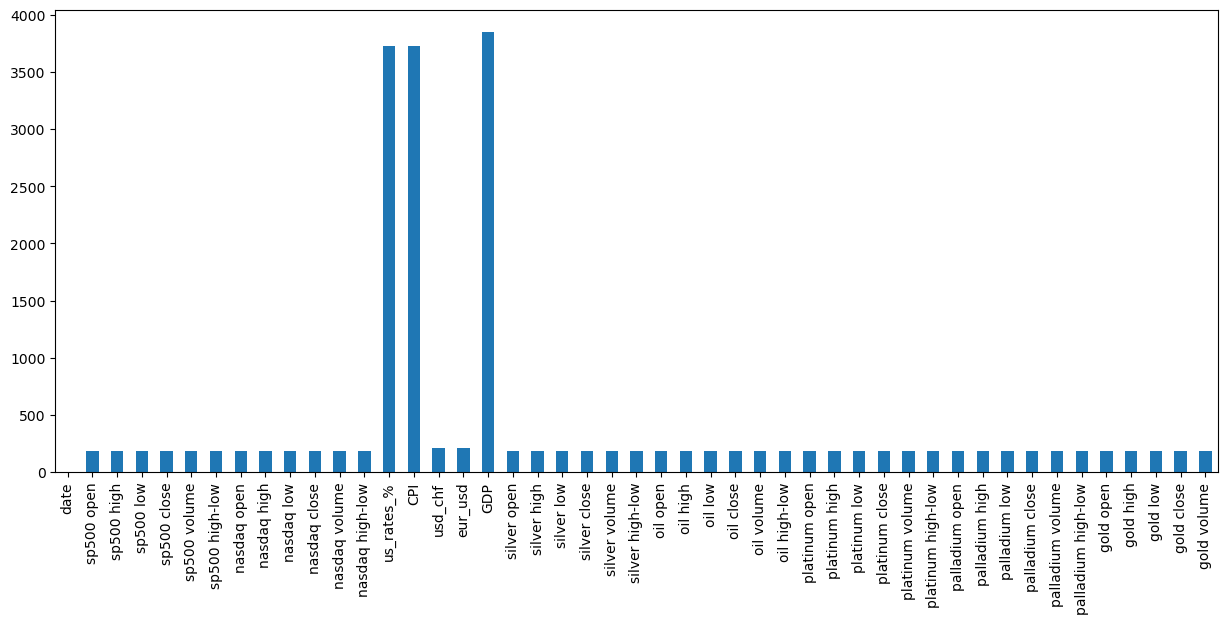

In [7]:
null_values.plot(kind='bar', figsize=(15,6))

### Show Correlation of the All Dataset

In [8]:
corr_matrix = gold_df.drop(columns=['date']).corr()
corr_matrix

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
sp500 open,1.000000,0.999916,0.999889,0.999810,-0.514871,0.513681,0.991532,0.991454,0.991491,0.991358,...,0.644674,0.644103,0.644019,-0.295577,0.412253,0.681216,0.679174,0.684501,0.681244,-0.283442
sp500 high,0.999916,1.000000,0.999823,0.999880,-0.511390,0.520522,0.991573,0.991627,0.991556,0.991538,...,0.646575,0.645874,0.645887,-0.295013,0.416337,0.681915,0.679919,0.685170,0.681964,-0.281198
sp500 low,0.999889,0.999823,1.000000,0.999898,-0.520291,0.504377,0.991320,0.991262,0.991461,0.991325,...,0.642729,0.642293,0.642185,-0.296271,0.408034,0.680457,0.678383,0.683810,0.680525,-0.286875
sp500 close,0.999810,0.999880,0.999898,1.000000,-0.516595,0.511622,0.991378,0.991433,0.991516,0.991548,...,0.644616,0.644060,0.644041,-0.295603,0.411877,0.681226,0.679190,0.684539,0.681309,-0.284437
sp500 volume,-0.514871,-0.511390,-0.520291,-0.516595,1.000000,0.142159,-0.467185,-0.464952,-0.470823,-0.468469,...,-0.320783,-0.329425,-0.325452,0.461173,-0.005533,-0.166782,-0.162057,-0.173572,-0.167480,0.582209
sp500 high-low,0.513681,0.520522,0.504377,0.511622,0.142159,1.000000,0.519660,0.524764,0.512485,0.517817,...,0.506002,0.493619,0.499144,-0.094053,0.590448,0.415688,0.418188,0.412921,0.414887,0.113734
nasdaq open,0.991532,0.991573,0.991320,0.991378,-0.467185,0.519660,1.000000,0.999929,0.999901,0.999811,...,0.645686,0.644569,0.644717,-0.249597,0.425092,0.738224,0.736407,0.741082,0.738189,-0.241723
nasdaq high,0.991454,0.991627,0.991262,0.991433,-0.464952,0.524764,0.999929,1.000000,0.999871,0.999896,...,0.647291,0.646068,0.646293,-0.249156,0.428455,0.738588,0.736806,0.741425,0.738573,-0.240090
nasdaq low,0.991491,0.991556,0.991461,0.991516,-0.470823,0.512485,0.999901,0.999871,1.000000,0.999915,...,0.644100,0.643081,0.643214,-0.249942,0.421907,0.737751,0.735915,0.740660,0.737749,-0.244035
nasdaq close,0.991358,0.991538,0.991325,0.991548,-0.468469,0.517817,0.999811,0.999896,0.999915,1.000000,...,0.645802,0.644698,0.644899,-0.249521,0.424877,0.738136,0.736326,0.741017,0.738153,-0.242344


### Visualize Dataset for Correlation 

<Axes: >

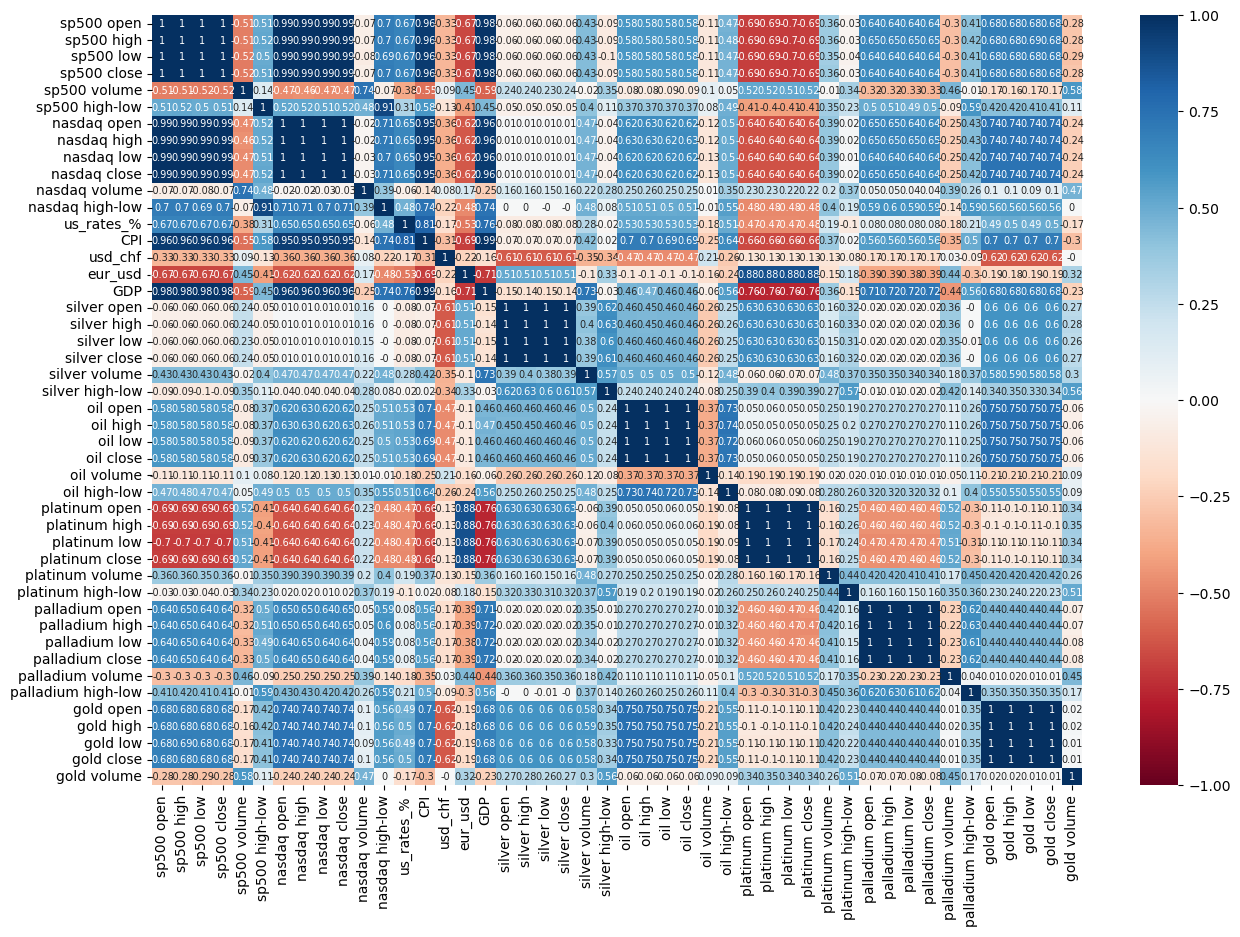

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(round(corr_matrix,2), cmap='RdBu', annot=True, 
            annot_kws={"size": 7}, vmin=-1, vmax=1)

### Drop Columns with Over Half Null Values

In [10]:
threshold = len(gold_df) * 0.5
gold_df = gold_df.dropna(thresh=threshold, axis=1)

### Visualize Null Values After Drop Large Null Columns

<Axes: >

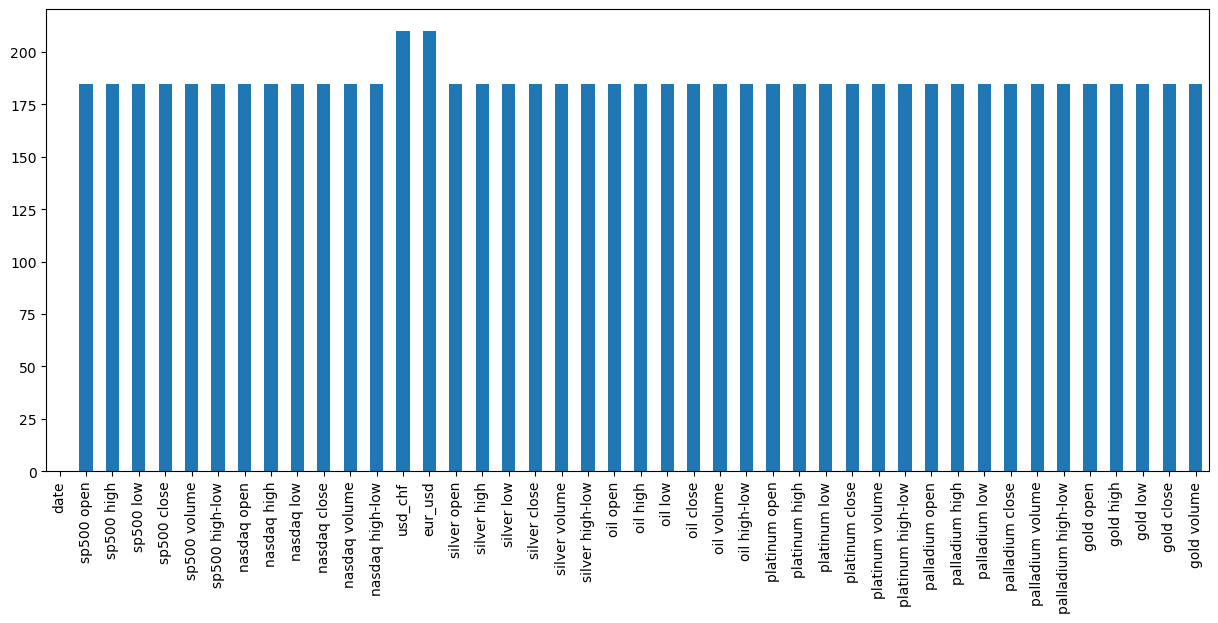

In [11]:
gold_df.isnull().sum().plot(kind='bar', figsize=(15,6))

### Drop Columns With Specific Words

In [12]:
columns_to_drop = [col for col in gold_df.columns if any(keyword in col for keyword in ['open', 'high', 'low', 'volume', 'high-low', 'nasdaq close', 'eur_usd', 'date'])]
gold_df = gold_df.drop(columns=columns_to_drop)
gold_df

,sp500 close,usd_chf,silver close,oil close,platinum close,palladium close,gold close
0,114.93,1.0206,18.66,39.06,161.45,44.84,112.03
1,113.64,1.0264,18.41,38.40,160.25,45.76,110.86
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,115.06,1.0340,18.79,38.93,165.12,46.94,111.52
4,113.89,1.0453,17.86,37.89,163.22,47.05,108.94
...,...,...,...,...,...,...,...
3899,582.35,0.8654,30.25,72.62,91.16,95.68,248.63
3900,584.59,0.8659,32.12,71.38,92.98,99.46,251.27
3901,583.63,NaN,32.32,72.26,92.27,97.35,251.22
3902,583.32,NaN,33.23,73.98,94.51,99.41,253.93


### Fill Null Values

In [13]:
gold_df = gold_df.fillna(gold_df.median())

### Visualize Correlation Heatmap after filter the Dataset

<Axes: >

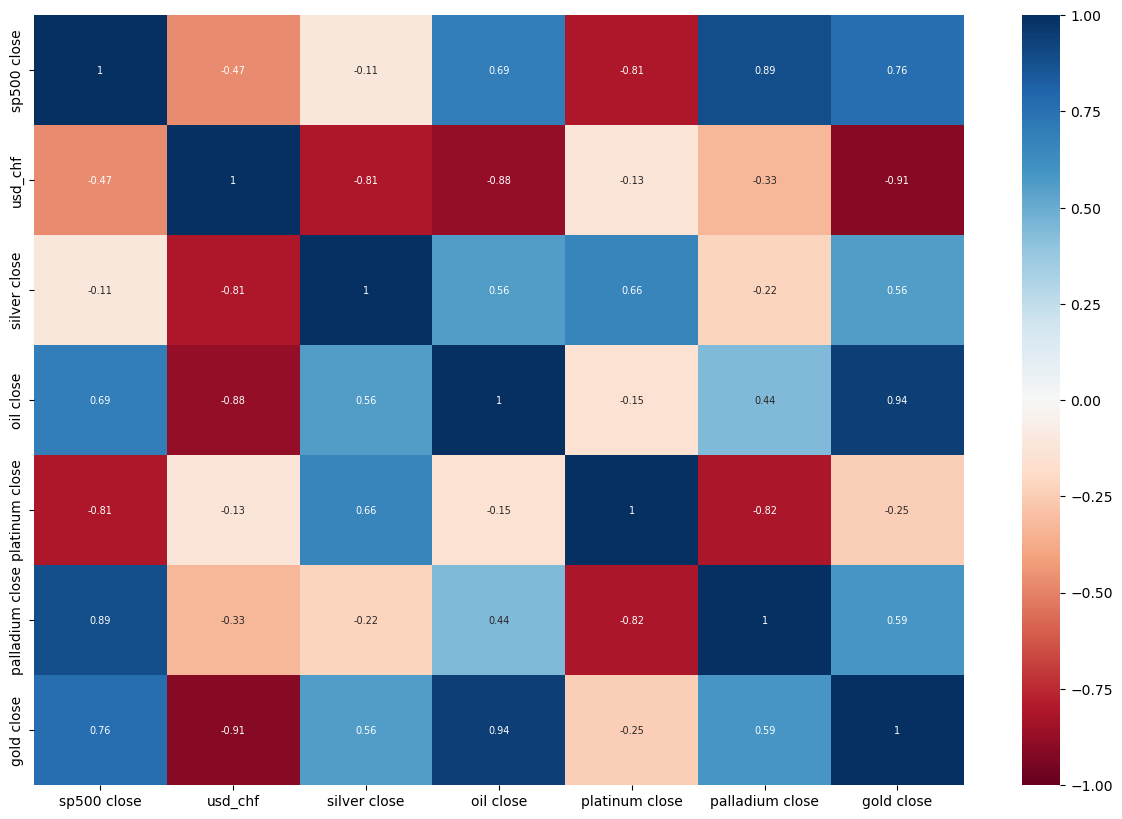

In [14]:
corr_matrix = gold_df.corr()


plt.figure(figsize=(15,10))
sns.heatmap(round(corr_matrix.corr(),2), cmap='RdBu', annot=True, 
            annot_kws={"size": 7}, vmin=-1, vmax=1)

### Split The Dataset To Train and Test

In [15]:
X = gold_df.drop(columns=['gold close'])
y = gold_df['gold close']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Use Random Forest Regression

In [16]:
regressor = RandomForestRegressor(n_estimators=100)

### Train The Model

In [17]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

### Make The Model Predict The Data

In [18]:
test_data_predication = regressor.predict(X_test)
print(test_data_predication)

[162.38298  184.1411   168.2062   140.242    160.48488  189.1826
 181.9078   155.4241   128.6096   127.155999 122.4006   158.83971
 188.671    156.05952  110.8702   186.8921   167.83406  121.2277
 105.0358   188.2925   155.358    135.99307  125.2057   185.5821
 112.5809   120.6366   171.7124   116.68     157.8651   153.85178
 133.03202  123.8775   160.898986 171.4181   156.6823   164.629
 154.2413   118.661592 185.3367   119.4329   174.9888   107.8549
 116.4389   141.682    126.1101   112.0049   169.4459   170.6046
 121.8696   119.8028   160.416776 144.6385   124.4687   160.56699
 185.6838   133.592825 108.1263   186.1334   155.631594 126.9651
 125.7551   115.5509   141.1981   172.7648   159.8084   113.4118
 122.6352   119.8741   169.1226   115.57476  161.5702   173.3723
 137.71     115.194    121.9291   115.991    119.8579   164.365558
 144.3037   183.4183   127.8734   123.9536   169.478417 141.5079
 179.6667   166.8542   118.3599   153.5361   126.2773   111.3417
 150.14811  104.7614 

### Make Evaluation Function

In [19]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Display results
    print(f"Training MSE: {train_mse:.4f}")
    print(f"Testing MSE: {test_mse:.4f}")
    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Testing RMSE: {test_rmse:.4f}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Testing R²: {test_r2:.4f}")

### Evaluate Random Forest Regression 

In [20]:
evaluate_model(regressor, X_train, Y_train, X_test, Y_test)

Training MSE: 0.5253
Testing MSE: 4.7962
Training RMSE: 0.7247
Testing RMSE: 2.1900
Training R²: 0.9994
Testing R²: 0.9947


### Use KNN Model

In [21]:
knn_regressor = KNeighborsRegressor(n_neighbors= 5)
knn_regressor.fit(X_train, Y_train)

KNeighborsRegressor()

### Evaluate KNN Model

In [22]:
evaluate_model(knn_regressor, X_train, Y_train, X_test, Y_test)

Training MSE: 2.6559
Testing MSE: 4.1273
Training RMSE: 1.6297
Testing RMSE: 2.0316
Training R²: 0.9968
Testing R²: 0.9954


### Visualize Confusion Matrix

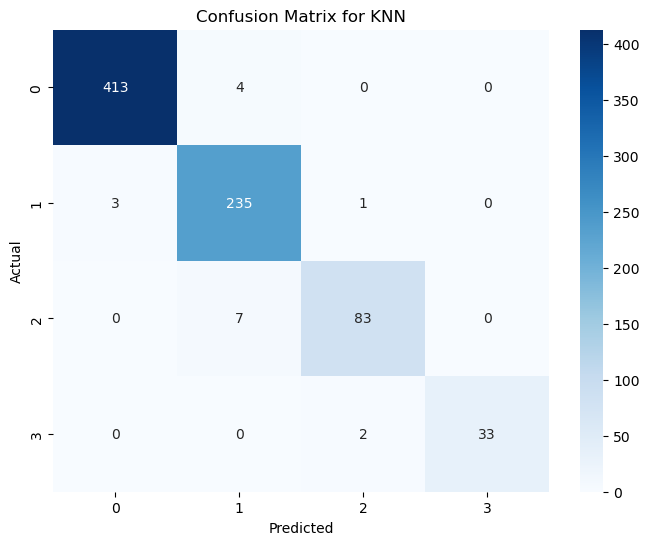

In [28]:
y_knn_pred = knn_regressor.predict(X_test)


# Make The Columns Value Discrete
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
y_test_discrete = discretizer.fit_transform(Y_test.values.reshape(-1, 1)).ravel()
y_knn_pred_discrete = discretizer.transform(y_knn_pred.reshape(-1, 1)).ravel()

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_discrete, y_knn_pred_discrete)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()